In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from pytorch_test import transformers
from pytorch_test import datasets

Test of creating a pandas dataset loader thing with more flexible transformation pipeline.

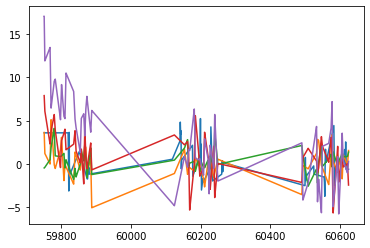

In [6]:
label_map = {
    90: "SNIa",
    67: "SNIa-91bg",
    52: "SNIax",
    42: "SNII",
    62: "SNIbc",
    95: "SLSN-I",
    15: "TDE",
    64: "KN",
    88: "AGN",
    # 92: "RRL",
    65: "M-dwarf",
    # 16: "EB",
    # 53: "Mira",
    6: "μLens-Single",
    991: "μLens-Binary",
    992: "ILOT",
    993: "CaRT",
    994: "PISN",
    # 995: "μLens-String"
}
transform = transformers.split_transformer((
    transformers.sequential_transformer([ # x (input)
        transformers.pivot_transformer(val_idx=1, col_idx=2, row_idx=0),
        transformers.interpolate_transformer(interp_cols=[1,2,3,4,5]),
        transformers.tensor_transformer()
    ]),
    transformers.sequential_transformer([ # y (true values)
        transformers.label_binarizer_transformer(list(label_map.keys())),
        transformers.tensor_transformer()
    ])
    
))

test = datasets.plasticc_dataset("data/plasticc_train_lightcurves.parquet",transform=transform)
def print_plot(obj):
    idx = obj[:,0]
    for i in range(1,obj.shape[1] - 1):
        plt.plot(idx, obj[:,i])
t = test[5][0]
print_plot(t)